### Описание данных

Имеем таблицу с арендой велосипедов в Лондоне с разбивкой почасам в течение суток. В наличии данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.  

__timestamp__ – дата и время (точность до часа)  
__cnt__ – количество аренд велосипедов за этот час  
__t1__ – температура, в С  
__t2__ – температура "ощущается как", в С  
__hum__ – влажность (%)  
__wind_speed__ – скорость ветра, км/ч  
__weather_code__ – погодные условия:  
- 1 – ясно (SKC)  
- 2 – преимущественно ясно / встречаются отдельные облака (SCT)
- 3 – облачно / значительные облака (BKN)
- 4 – пасмурно (OVC)
- 7 – небольшой дождь Rain/ light Rain shower/ Light rain 
- 10 – дождь с грозой
- 26 – снегопад 
- 94 – ледяной туман (да, такое бывает!)  

__isholiday__ – является ли день праздником (1 – праздник, 0 – нет)  
__isweekend__ –  является ли день выходным (1 – выходной, 0 – нет)  
__season__ – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
bikes = pd.read_csv('/home/vitsli/DataAnalitycs/statistic_lessons/london.csv')

In [43]:
bikes.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [44]:
bikes.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [45]:
bikes.timestamp = pd.to_datetime(bikes.timestamp)

In [46]:
bikes.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [47]:
bikes.season.isna().sum()

0

In [48]:
bikes.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


Взглянем на распределение аренд байков по будням и выходным

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

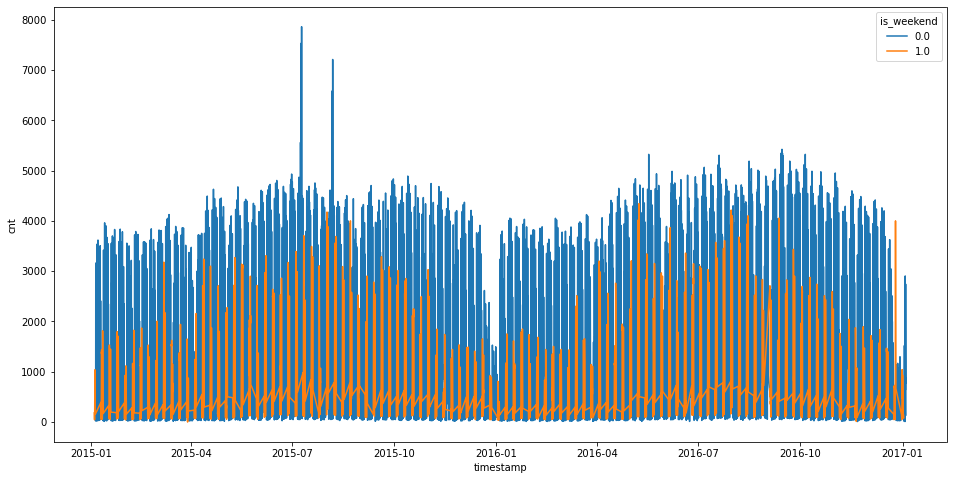

In [49]:
plt.figure(figsize=(16,8))
sns.lineplot(x='timestamp', y='cnt', hue='is_weekend', data=bikes)

Очевидно, что в таком виде график малоинформативен, схлопнем разбивку с почасовой до посуточной

In [50]:
bikes.timestamp = bikes.timestamp.sort_values()
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [51]:
bikes = bikes.set_index('timestamp')

In [52]:
bikes.head(10)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0


In [53]:
bikes.resample(rule='D').cnt.sum()

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

In [72]:
bikes.groupby('season', as_index=False).agg({'cnt':'mean'})

,season,cnt
0,0.0,1103.831589
1,1.0,1464.465238
2,2.0,1178.954218
3,3.0,821.729099


<AxesSubplot:xlabel='timestamp'>

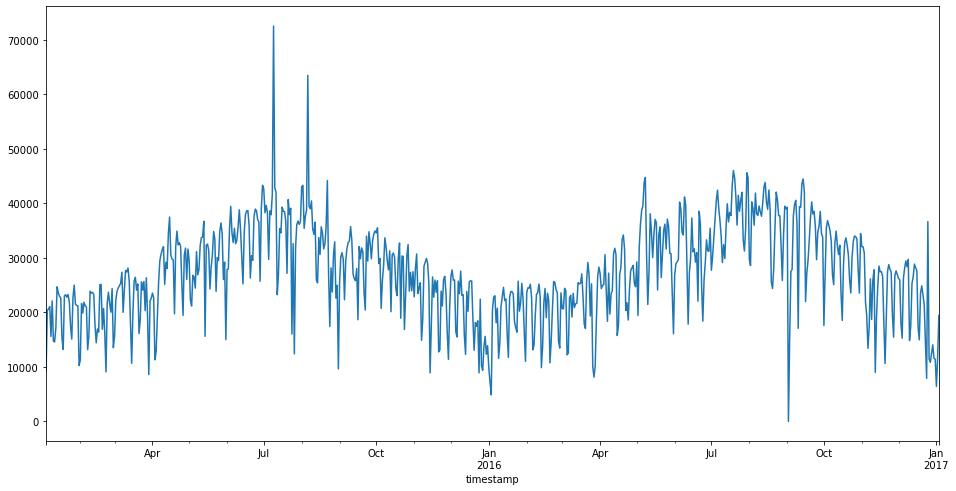

In [55]:
plt.figure(figsize=(16,8))
bikes.resample(rule='D').cnt.sum().plot()

<AxesSubplot:xlabel='timestamp'>

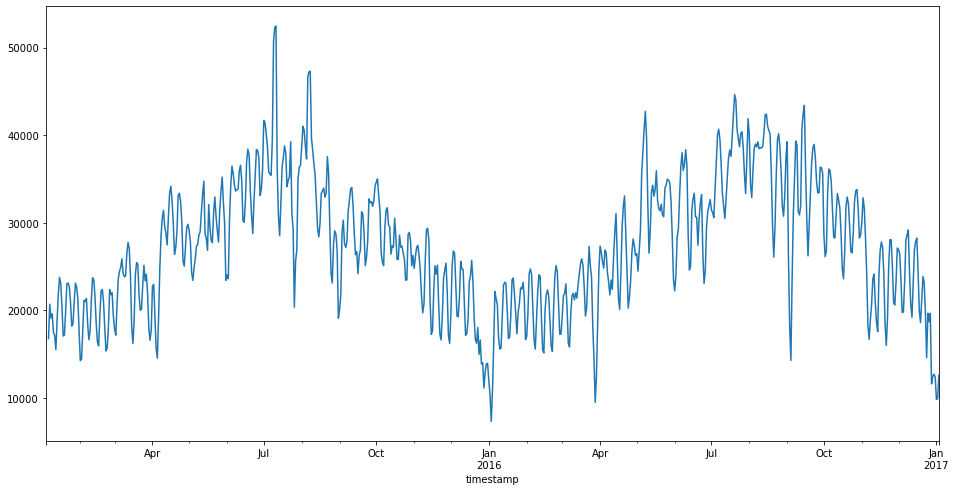

In [56]:
plt.figure(figsize=(16,8))
bikes.resample(rule='D').cnt.sum().rolling(window=3).mean().plot()


На обоих графиках имеем явно прослеживаемую сезонность:наибольший спрос на аренду велосипедов наблюдается в летние месяцы, наименьший  - в зимние.

In [71]:
bikes.groupby(['season', 'is_weekend'], as_index=False).agg({'cnt':'mean'})

,season,is_weekend,cnt
0,0.0,0.0,1155.294043
1,0.0,1.0,975.113944
2,1.0,0.0,1495.814013
3,1.0,1.0,1385.527666
4,2.0,0.0,1264.146571
5,2.0,1.0,965.139478
6,3.0,0.0,918.106541
7,3.0,1.0,582.104670


In [79]:
bikes.groupby(['season', 'weather_code'], as_index=False).agg({'cnt':'mean'}).sort_values('cnt', ascending=False)

,season,weather_code,cnt
8,1.0,2.0,1875.399464
14,2.0,2.0,1534.986460
7,1.0,1.0,1471.312843
1,0.0,2.0,1436.080628
9,1.0,3.0,1393.618065
15,2.0,3.0,1281.383778
2,0.0,3.0,1162.028607
0,0.0,1.0,1144.472603
13,2.0,1.0,1130.973451
21,3.0,2.0,1056.560475


В будние дни среднее количество аренд велосипедов выше, чем в выходные в любой из сезонов. Вероятно, жители Лондона чаще арендуют байки для поездок на работу, в то время как выходные возможно больше предпочитают проводить дома. Также ожидаемо наибольшее количество аренд мы видим в ясную и преимуществено ясную погоду, а наименьшее - в снегопад и дождь с грозой.

Для полученного ранее распределения поездок в разбивке по дням построим доверительный интервал (99%), который поможет нам выявить аномальные значения. Среднее отклонение посчитаем для разности между имеющимися данными и скользящим средним с окном в 3 дня

In [80]:
bikes_daycounts = bikes.resample(rule='D').cnt.sum().to_frame()
bikes_daycounts['rolling'] = bikes.resample(rule='D').cnt.sum().rolling(window=3).mean()

In [30]:
bikes_daycounts['diff'] = bikes_daycounts['cnt'] - bikes_daycounts['rolling']

In [31]:
bikes_daycounts = bikes_daycounts.reset_index()

In [32]:
std_bikes = np.std(bikes_daycounts['diff'])

In [33]:
bikes_daycounts['lower_bound'] = bikes_daycounts['rolling'] -  (2.576 * std_bikes)
bikes_daycounts['upper_bound'] = bikes_daycounts['rolling'] +  (2.576 * std_bikes)

In [36]:
bikes_daycounts.head(10)

,timestamp,cnt,rolling,diff,lower_bound,upper_bound
0,2015-01-04,9234,NaN,NaN,NaN,NaN
1,2015-01-05,20372,NaN,NaN,NaN,NaN
2,2015-01-06,20613,16739.666667,3873.333333,4996.747479,28482.585854
3,2015-01-07,21064,20683.000000,381.000000,8940.080812,32425.919188
4,2015-01-08,15601,19092.666667,-3491.666667,7349.747479,30835.585854
5,2015-01-09,22104,19589.666667,2514.333333,7846.747479,31332.585854
6,2015-01-10,14709,17471.333333,-2762.333333,5728.414146,29214.252521
7,2015-01-11,14575,17129.333333,-2554.333333,5386.414146,28872.252521
8,2015-01-12,17199,15494.333333,1704.666667,3751.414146,27237.252521
9,2015-01-13,24697,18823.666667,5873.333333,7080.747479,30566.585854


In [116]:
bikes_daycounts.query('cnt > upper_bound')

,timestamp,cnt,rolling,diff,lower_bound,upper_bound
186,2015-07-09,72504,50705.000000,21799.000000,38962.080812,62447.919188
214,2015-08-06,63468,46627.333333,16840.666667,34884.414146,58370.252521
609,2016-09-04,27512,14259.000000,13253.000000,2516.080812,26001.919188
721,2016-12-25,36653,19650.666667,17002.333333,7907.747479,31393.585854


Из полученного списка максимально выбивается дата 9 сентября 2015 года. Согласно данным поисковых систем в этот день в Лондоне состоялась масштабная забастовка сотрудников метро, из-за которой столичная "подземка" впервые за 13 лет полностью закрылась. Это объясняет столь аномальный рост количества аренд велосипедов

Посмтрим, что у нас с нижней границей доверительного интервала

In [38]:
bikes_daycounts.query('cnt < lower_bound')

,timestamp,cnt,rolling,diff,lower_bound,upper_bound
130,2015-05-14,15609,28709.333333,-13100.333333,16966.414146,40452.252521
189,2015-07-12,23240,36036.666667,-12796.666667,24293.747479,47779.585854
201,2015-07-24,16034,31013.666667,-14979.666667,19270.747479,42756.585854
232,2015-08-24,17400,29529.333333,-12129.333333,17786.414146,41272.252521
314,2015-11-14,8898,21037.333333,-12139.333333,9294.414146,32780.252521
607,2016-09-02,0,26086.333333,-26086.333333,14343.414146,37829.252521
615,2016-09-10,17080,31262.000000,-14182.000000,19519.080812,43004.919188
621,2016-09-16,21967,36193.333333,-14226.333333,24450.414146,47936.252521
678,2016-11-12,8990,20878.000000,-11888.000000,9135.080812,32620.919188


Наибольший интерес вызывает дата 2 сентября 2016 года, в которую у нас не было ни одной аренды, хотя скользящее среднее спрогнозировало более 26 тыс. аренд. Поиск в интернете не выявил каких либо инфоповодов, способных спрогнозировать подобное падение спроса. Вероятнее всего мы имеем дело  ошибкой в данных, информация за данный день просто отсутствует в таблице